In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
print(tf.__version__)

1.12.0


In [3]:
QBtrain = pd.read_csv('TrainingBig/QBtrain.csv')
QBtrain.columns

Index(['Unnamed: 0', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'Third

In [4]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [5]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,...,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000,1890.000000
mean,19.400543,30.390942,59.907420,221.755154,6.918360,1.379154,0.708906,85.462334,2.780055,11.508853,...,55.808095,6.219524,14.938730,108.305291,63.281058,239.284927,6.805767,10.748942,1.590664,88.548677
std,7.554214,11.203584,16.499532,88.531349,2.217633,0.800272,0.522592,26.309620,1.951155,12.172849,...,8.916860,1.327170,2.278893,133.302600,3.458844,24.370913,0.606296,0.753057,0.369485,9.251558
min,0.000000,0.000000,0.000000,-0.666667,-0.700000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.546703,28.861607,59.462500,191.892857,6.500000,1.000000,0.333333,78.887500,1.416667,2.102778,...,50.000000,5.400000,13.300000,34.187500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,21.369318,33.250000,63.687500,244.366667,7.286607,1.400000,0.666667,90.669643,2.333333,7.651515,...,55.300000,6.200000,14.500000,35.812500,63.300000,237.875000,6.800000,10.700000,1.562500,89.000000
75%,24.104167,37.000000,67.210000,275.363636,7.925000,2.000000,1.000000,99.876500,3.750000,17.437500,...,60.000000,7.100000,16.400000,40.625000,64.900000,252.375000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,88.900000,10.100000,22.300000,506.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [6]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [7]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [8]:
df = QBtrain.drop(['Name', 'Home'], axis=1).astype('float64')

In [9]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df)
y_noano = clf.predict(df)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 189
Number of rows without outliers: 1701


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [11]:
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CompletionsGame,1512.0,19.336699,7.676013,0.000000,17.500000,21.428571,24.000000,39.000000
AttemptsGame,1512.0,30.222548,11.366151,0.000000,28.842857,33.285714,37.000000,53.000000
PassingCompletionPercentage,1512.0,59.915045,16.998376,0.000000,59.597500,63.775962,67.334615,100.000000
YardsGame,1512.0,220.684273,89.932527,-0.666667,190.450000,244.366667,275.704545,439.000000
PassingYardsPerAttempt,1512.0,6.906048,2.279477,-0.700000,6.500000,7.291288,7.942857,22.000000
PassingTouchdownsGame,1512.0,1.379158,0.810159,0.000000,1.000000,1.400000,2.000000,4.333333
InterceptionsGame,1512.0,0.704513,0.525616,0.000000,0.333333,0.666667,1.000000,4.000000
PassingRating,1512.0,85.527312,26.860737,0.000000,78.663571,90.925000,100.059712,158.330000
RushingAttemptsGame,1512.0,2.736682,1.919784,0.000000,1.400000,2.333333,3.723214,14.000000
RushingYardsGame,1512.0,11.271576,12.163689,-7.000000,2.000000,7.333333,16.754808,104.000000


In [12]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
df_labels = df.pop('Score')

In [13]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_df = norm(df)

In [14]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [15]:
model = build_model()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [17]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.28917503],
       [-0.5840559 ],
       [-0.17266887],
       [-0.89890504],
       [-1.9038286 ],
       [-0.71534276],
       [ 0.15335655],
       [-0.99764025],
       [-0.17213589],
       [-0.38021967]], dtype=float32)

In [18]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,84.627769,7.141736,84.627769,17.782049,3.259599,17.782049,495
496,88.946722,7.217476,88.946722,17.562788,3.225163,17.562788,496
497,86.313362,7.275816,86.313362,17.613479,3.218102,17.613479,497
498,86.431102,7.167313,86.431102,17.373066,3.235980,17.373066,498
499,86.440416,7.243274,86.440416,17.499614,3.224456,17.499614,499


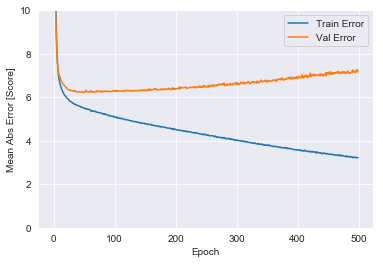

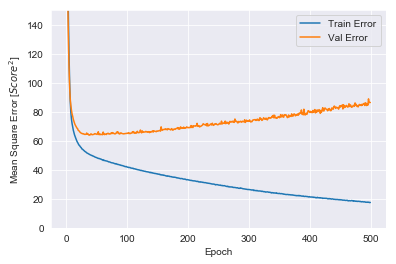

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Score]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,10])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Score^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,150])

plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  6.75 Score



.................................................................

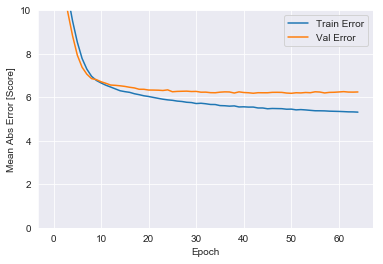

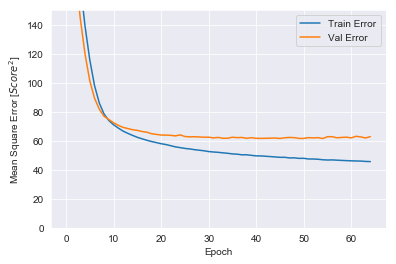

In [22]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  6.08 Score


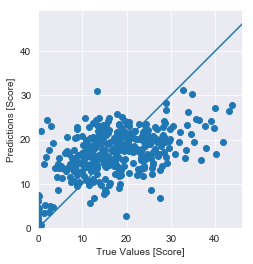

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Score]')
plt.ylabel('Predictions [Score]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

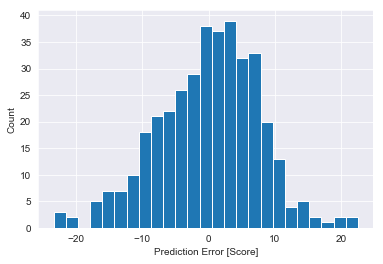

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Score]")
_ = plt.ylabel("Count")

In [26]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


...................................................................

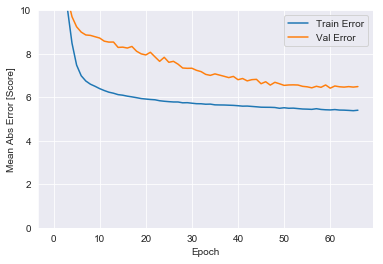

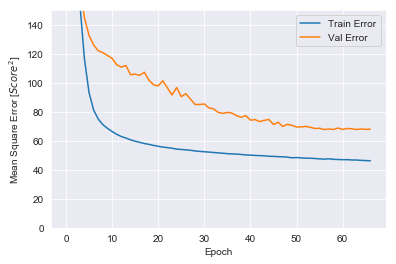

In [27]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_df, df_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [28]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,21.2,275,833,4748,5.7,287,158,38.0,40,45.0,...,26.7,8.7,21.1,432,61.6,3114,7.2,11.7,22,85
CHI,27.6,359,832,4513,5.4,275,165,40.0,44,63.6,...,19.5,6.3,12.4,429,65.5,2934,6.8,10.4,25,91
CIN,23.6,307,771,4273,5.5,262,148,38.5,36,75.0,...,25.4,5.9,11.3,466,62.7,2989,6.4,10.2,24,87
BUF,15.5,201,825,3796,4.6,226,180,32.2,30,56.7,...,23.4,8.8,20.0,406,54.4,2167,5.3,9.8,8,56
DEN,22.3,290,809,4662,5.8,260,165,32.7,38,57.9,...,17.9,6.2,16.9,455,62.0,2969,6.5,10.5,16,83


In [29]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [30]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [31]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [32]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [33]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [34]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating,OpponentRushingTouchdowns
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.9,350,823,4459,5.4,271,170,37.1,48,62.5,...,6.4,16.5,453,61.6,3058,6.8,11.0,28,100,10
CHI,19.0,247,832,4029,4.8,232,180,34.4,32,56.2,...,7.4,14.8,502,61.8,2947,5.9,9.5,21,71,4
CIN,30.5,397,893,5485,6.1,318,182,52.7,50,68.0,...,5.7,14.1,463,66.7,3560,7.7,11.5,27,99,17
BUF,24.6,320,779,3778,4.8,242,166,38.0,42,71.4,...,7.1,17.2,406,63.8,2416,6.0,9.3,19,83,14
DEN,21.7,282,849,4984,5.9,264,175,38.9,37,56.8,...,7.9,16.7,468,64.5,3435,7.3,11.4,23,90,8


In [35]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [36]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [37]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [38]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [39]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,24.769231,37.076923,66.8,330.769231,8.9,3.307692,0.846154,115.15,4.076923,18.076923,4.4,0.153846,30.5
Ben Roethlisberger,PIT,2,28.153846,42.000000,67.0,325.153846,7.7,2.153846,1.000000,97.37,1.846154,7.230769,3.9,0.230769,24.7
Matt Ryan,ATL,3,27.230769,38.615385,70.5,313.538462,8.1,2.153846,0.461538,108.29,1.923077,7.769231,4.0,0.153846,24.0
Andrew Luck,IND,4,27.615385,40.769231,67.7,289.153846,7.1,2.615385,1.000000,99.25,2.384615,7.538462,3.2,0.000000,23.5
Drew Brees,NO,5,24.153846,31.923077,75.7,266.384615,8.3,2.384615,0.307692,120.79,2.153846,1.923077,0.9,0.307692,23.2


In [40]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,4.307692,6.615385,65.1,32.538462,4.9,2.384615,0.076923,111.58,0.923077,3.230769,3.5,0.153846,12.0
Andrew Luck,4.000000,6.307692,63.4,30.307692,4.8,2.153846,0.076923,109.45,0.230769,1.076923,4.7,0.000000,10.2
Drew Brees,4.461538,6.384615,69.9,26.692308,4.2,1.615385,0.000000,117.32,0.461538,1.000000,2.2,0.307692,9.6
Cam Newton,2.923077,4.230769,69.1,20.153846,4.8,1.461538,0.076923,111.52,1.230769,4.153846,3.4,0.307692,9.1
Jared Goff,3.692308,6.153846,60.0,26.538462,4.3,1.538462,0.153846,99.22,0.461538,1.000000,2.2,0.076923,8.1


In [41]:
QBsnaps = pd.read_csv('Input/Aggregate/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Josh Johnson,WAS,QB,1,29,29.0,46.8,24.1,0.0,79.3,79.3,25.30,87.2
1,2,Patrick Mahomes,KC,QB,13,872,67.1,100.0,6.1,0.0,61.4,61.4,396.50,45.5
2,3,Ryan Fitzpatrick,TB,QB,8,428,53.5,46.3,8.4,0.0,65.9,65.9,190.84,44.6
3,4,Cam Newton,CAR,QB,13,826,63.5,98.8,11.6,0.0,65.1,65.1,298.86,36.2
4,5,Drew Brees,NO,QB,13,838,64.5,97.7,3.3,0.1,53.0,53.0,302.12,36.1


In [42]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [43]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,16.91
BUF,13.99
MIN,17.23
JAX,17.36
DAL,17.87


In [44]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
LAC,Patrick Mahomes,KC,6900.0,26.78
PIT,Tom Brady,NE,5900.0,24.54
NE,Ben Roethlisberger,PIT,6600.0,24.50
PHI,Jared Goff,LAR,6400.0,24.11
KC,Philip Rivers,LAC,6300.0,23.73


In [45]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
KC,True,-3.0,52.5,27.75
HOU,False,-6.5,41.0,23.75
DEN,True,-3.0,45.0,24.00
IND,True,-3.0,46.5,24.75
JAX,True,-7.5,36.0,21.75


In [46]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4700.0,14.07,24.21,28.2,63.469210,386.501362,6.1,23.512807,12.140599,...,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,8.2,19.6
ARI,Mike Glennon,4200.0,0.21,24.21,28.2,63.469210,386.501362,6.1,23.512807,12.140599,...,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,8.2,19.6
ATL,Matt Ryan,6100.0,20.39,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,...,63.133861,374.881329,5.9,21.993038,12.842089,46.1,3.075949,65.0,6.9,18.2
ATL,Matt Schaub,4000.0,0.08,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,...,63.133861,374.881329,5.9,21.993038,12.842089,46.1,3.075949,65.0,6.9,18.2
BAL,Lamar Jackson,5900.0,18.61,23.08,29.5,61.464752,388.429504,6.3,22.259791,11.014360,...,71.406854,369.730530,5.2,23.391900,14.466044,46.8,3.616511,63.8,5.1,11.1


In [47]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4700.0,14.07,24.21,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,8.2,19.6
Mike Glennon,4200.0,0.21,24.21,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,8.2,19.6
Matt Ryan,6100.0,20.39,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,63.133861,374.881329,5.9,21.993038,12.842089,46.1,3.075949,65.0,6.9,18.2
Matt Schaub,4000.0,0.08,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,63.133861,374.881329,5.9,21.993038,12.842089,46.1,3.075949,65.0,6.9,18.2
Lamar Jackson,5900.0,18.61,23.08,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,71.406854,369.730530,5.2,23.391900,14.466044,46.8,3.616511,63.8,5.1,11.1


In [48]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4700.0,14.07,24.21,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.000000,2.8,56.4,82.1,2.7,0.0,53.4,53.4,18.1
Matt Ryan,6100.0,20.39,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,-1.8,0.153846,7.8,66.1,99.0,2.9,0.0,61.4,61.4,36.3
Matt Schaub,4000.0,0.08,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,0.0,0.000000,0.0,5.0,1.2,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,5900.0,18.61,23.08,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,3.4,0.230769,3.1,28.5,38.1,25.6,0.5,52.8,53.4,28.8
Joe Flacco,5300.0,2.44,23.08,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,0.0,0.000000,5.0,71.1,65.7,3.0,0.0,62.2,62.2,23.5


In [49]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,24.21,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,3.380926,72.7,...,0.0,0.000000,2.8,56.4,82.1,2.7,0.0,53.4,53.4,18.1
Matt Ryan,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,3.236697,61.9,...,-1.8,0.153846,7.8,66.1,99.0,2.9,0.0,61.4,61.4,36.3
Matt Schaub,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,3.236697,61.9,...,0.0,0.000000,0.0,5.0,1.2,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,23.08,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,3.543081,82.6,...,3.4,0.230769,3.1,28.5,38.1,25.6,0.5,52.8,53.4,28.8
Joe Flacco,23.08,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,3.543081,82.6,...,0.0,0.000000,5.0,71.1,65.7,3.0,0.0,62.2,62.2,23.5
Robert Griffin III,23.08,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,3.543081,82.6,...,0.0,0.000000,0.0,7.0,4.1,0.0,0.0,28.6,28.6,4.0
Josh Allen,19.07,24.5,58.677116,348.145768,5.9,20.736677,11.136364,39.3,3.072100,60.0,...,5.9,0.555556,5.5,58.7,65.0,12.5,0.2,55.5,55.7,29.0
Derek Anderson,19.07,24.5,58.677116,348.145768,5.9,20.736677,11.136364,39.3,3.072100,60.0,...,0.0,0.000000,0.1,59.0,24.1,0.8,0.0,60.2,60.2,10.6
Matt Barkley,19.07,24.5,58.677116,348.145768,5.9,20.736677,11.136364,39.3,3.072100,60.0,...,0.0,0.000000,9.3,73.0,19.7,4.1,0.0,38.4,38.4,23.4


In [50]:
columns = train.drop('Score', axis=1)
X_test = X_test[columns.columns]

In [51]:
normed_x_test = norm(X_test)

In [52]:
new_predictions = model.predict(normed_x_test).flatten()

In [53]:
new_predictions

array([16.679995  , 13.322554  , -1.4322451 , 10.889897  , 18.056797  ,
        6.431671  , 13.735756  ,  9.2082205 ,  5.067336  , 20.454641  ,
        7.4095297 , 14.508653  ,  5.0348926 , 15.540287  , 15.194162  ,
       19.077574  , 12.722706  ,  2.7434845 , 14.69362   , 10.400852  ,
        0.9338878 , 17.7599    ,  6.0952344 , 16.91163   , -3.272499  ,
       -0.6561564 , 17.964901  ,  1.432235  ,  7.588582  , 12.871497  ,
       22.912926  , 17.149014  ,  3.9789896 , 21.4892    , -1.007808  ,
        9.762624  ,  9.447252  , 16.566797  , 17.478283  ,  3.3212738 ,
       24.066465  ,  2.9373016 ,  0.98424184, 11.496666  ,  1.0707514 ,
        8.892698  ,  9.78587   , 19.520672  ,  6.6921    , 13.907686  ,
        4.9989977 , 21.33508   ,  4.069779  , 16.368551  , 11.598417  ,
        5.260129  ,  9.842737  , 11.312536  ,  7.8542247 ,  9.214281  ,
        6.20193   ,  6.384506  ,  6.736558  ,  3.6372285 ], dtype=float32)

In [54]:
QBs['DNN'] = new_predictions

In [55]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test = X_test[X_train.columns]

In [56]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [57]:
QBNe = neigh.predict(X_test)

In [58]:
QBs['NeProjections'] = QBNe

In [59]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4700.0,14.07,24.21,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,56.4,82.1,2.7,0.0,53.4,53.4,18.1,16.679995,13.592,3.08
Matt Ryan,6100.0,20.39,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,66.1,99.0,2.9,0.0,61.4,61.4,36.3,13.322554,20.928,25.04
Matt Schaub,4000.0,0.08,15.87,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,5.0,1.2,10.0,10.0,90.0,90.0,11.0,-1.432245,0.588,0.00
Lamar Jackson,5900.0,18.61,23.08,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,28.5,38.1,25.6,0.5,52.8,53.4,28.8,10.889897,12.584,17.74
Josh Allen,5800.0,20.33,19.07,24.5,58.677116,348.145768,5.9,20.736677,11.136364,39.3,...,58.7,65.0,12.5,0.2,55.5,55.7,29.0,13.735756,25.780,19.76
Cam Newton,5900.0,22.10,23.46,21.8,60.238869,349.339223,5.8,20.721555,11.400707,39.9,...,63.5,98.8,11.6,0.0,65.1,65.1,36.2,20.454641,14.184,5.74
Mitch Trubisky,6000.0,20.26,18.28,23.6,63.804560,351.001954,5.5,20.294463,13.606515,37.3,...,67.0,83.6,7.7,0.0,55.4,55.4,33.6,14.508653,18.668,19.00
Jeff Driskel,5100.0,17.67,21.14,29.8,60.060825,391.624227,6.5,20.122680,12.211856,46.5,...,32.7,23.9,5.6,0.0,56.6,56.6,27.7,15.540287,9.708,11.40
Baker Mayfield,6000.0,18.24,19.18,21.7,65.330851,383.520567,5.9,20.314894,13.466312,38.9,...,64.7,79.4,4.1,0.1,56.9,57.0,28.1,15.194162,15.564,14.12


In [60]:
y_test = QBs.Score
y_pred = QBs.DNN
mean_squared_error(y_test, y_pred)

47.78527357046969

In [61]:
y_test = QBs.Score
y_pred = QBs.NeProjections
mean_squared_error(y_test, y_pred)

44.873020444444435

In [62]:
RBtrain = pd.read_csv('TrainingBig/RBtrain.csv')
RBtrain.columns


Index(['Unnamed: 0', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZ

In [63]:
RBtrain = RBtrain.drop('Unnamed: 0', axis=1)
RBtrain = RBtrain.set_index('Name')

In [64]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,...,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000,6073.000000
mean,5.896766,24.299502,2.704013,0.169411,1.905790,1.426166,11.734373,0.056497,6.526034,6.833367,...,5.471645,20.063839,13.171917,39.178001,3.133146,55.642500,110.125392,4.185131,19.282332,0.794490
std,6.111873,26.938978,2.116932,0.288396,1.963589,1.521907,13.839650,0.136028,6.557011,8.361424,...,0.421229,1.799288,0.852331,4.218342,0.441864,8.635741,16.325876,0.411192,4.319794,0.266911
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.500000,25.200000,1.750000,34.800000,73.267578,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.700000,0.000000,0.333333,0.200000,1.000000,0.000000,0.900000,0.000000,...,5.200000,18.812500,12.687500,36.900000,2.812500,50.000000,98.750000,3.900000,16.300000,0.625000
50%,3.666667,14.500000,3.000000,0.000000,1.272727,1.000000,6.777778,0.000000,4.725000,3.700000,...,5.500000,20.000000,13.187500,39.000000,3.187500,55.300000,110.500000,4.200000,19.300000,0.750000
75%,10.250000,40.666667,4.075000,0.250000,3.000000,2.200000,18.000000,0.000000,10.300000,10.600000,...,5.700000,20.972368,13.812500,41.100000,3.437500,60.000000,120.888889,4.400000,21.800000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,88.900000,165.812500,5.300000,33.000000,1.562500


In [65]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,18.769231,92.538462,4.9,1.153846,5.230769,3.769231,38.769231,0.307692,27.4
Saquon Barkley,NYG,2,16.076923,86.461538,5.4,0.692308,7.384615,6.000000,48.384615,0.307692,27.0
Christian McCaffrey,CAR,3,13.769231,71.230769,5.2,0.538462,7.615385,6.615385,53.923077,0.461538,26.2
Ezekiel Elliott,DAL,4,20.615385,97.153846,4.7,0.461538,6.230769,5.000000,38.615385,0.230769,24.3
Alvin Kamara,NO,5,13.307692,61.000000,4.6,0.846154,6.923077,5.384615,45.461538,0.307692,24.1


In [66]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,4.769231,15.230769,3.2,1.153846,1.230769,0.615385,5.307692,0.230769,11.4
Alvin Kamara,3.538462,11.307692,3.2,0.769231,1.769231,1.461538,9.307692,0.230769,10.0
Christian McCaffrey,3.000000,8.615385,2.9,0.538462,1.000000,0.846154,5.307692,0.384615,7.7
Melvin Gordon,2.000000,11.100000,5.6,0.700000,1.300000,0.800000,3.300000,0.300000,8.6
James Conner,2.750000,7.333333,2.7,0.750000,0.583333,0.500000,3.000000,0.083333,6.9


In [67]:
RBsnaps = pd.read_csv('Input/Aggregate/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Brandon Bolden,MIA,RB,13,7,0.5,0.9,42.9,14.3,57.1,57.1,20.0,285.7
1,2,Justin Davis,LAR,RB,9,1,0.1,0.1,100.0,0.0,100.0,100.0,1.9,190.0
2,3,Zach Zenner,DET,RB,5,28,5.6,8.2,57.1,3.6,60.7,60.7,15.6,55.7
3,4,Nick Chubb,CLE,RB,13,294,22.6,32.8,49.0,7.5,54.4,56.5,173.0,58.8
4,5,Kenneth Dixon,BAL,RB,3,62,20.7,26.7,46.8,3.2,50.0,50.0,30.7,49.5


In [68]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [69]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,18.88
BUF,27.16
MIN,22.72
JAX,21.92
DAL,21.08


In [70]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
NO,Christian McCaffrey,CAR,8700.0,24.23
PHI,Todd Gurley,LAR,9500.0,24.06
TEN,Saquon Barkley,NYG,9400.0,24.05
IND,Ezekiel Elliott,DAL,9000.0,23.21
CAR,Alvin Kamara,NO,7800.0,21.95


In [71]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,7100.0,17.61,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,13.7,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,25.4
ARI,Chase Edmonds,3800.0,3.99,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,13.7,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,25.4
ARI,TJ Logan,3000.0,0.31,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,13.7,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,25.4
ARI,Derrick Coleman,3000.0,0.14,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,13.7,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,25.4
ATL,Tevin Coleman,4200.0,10.34,31.14,25.2,67.20000,350.950459,5.2,21.963303,13.023853,...,24.3,63.133861,374.881329,5.9,21.993038,12.842089,46.1,3.075949,65.0,33.7


In [72]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7100.0,17.61,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,13.7,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,25.4
Chase Edmonds,3800.0,3.99,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,13.7,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,25.4
TJ Logan,3000.0,0.31,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,13.7,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,25.4
Derrick Coleman,3000.0,0.14,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,13.7,55.415730,242.520787,4.4,14.931461,12.160674,31.0,1.693258,68.2,25.4
Tevin Coleman,4200.0,10.34,31.14,25.2,67.20000,350.950459,5.2,21.963303,13.023853,37.3,...,24.3,63.133861,374.881329,5.9,21.993038,12.842089,46.1,3.075949,65.0,33.7


In [73]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7100.0,17.61,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,1.307692,0.076923,4.3,47.9,82.5,35.3,9.8,42.2,45.1,33.2
Chase Edmonds,3800.0,3.99,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.000000,0.000000,1.1,11.1,19.1,29.2,11.8,39.6,41.0,34.6
TJ Logan,3000.0,0.31,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.000000,0.000000,0.0,1.6,2.6,9.1,27.3,36.4,36.4,49.1
Derrick Coleman,3000.0,0.14,31.78,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.000000,0.000000,0.0,4.8,8.2,3.2,4.8,6.5,8.1,6.5
Tevin Coleman,4200.0,10.34,31.14,25.2,67.20000,350.950459,5.2,21.963303,13.023853,37.3,...,3.923077,0.307692,3.6,37.8,56.6,28.1,8.4,34.4,36.5,32.3


In [74]:
RB_train = RBtrain.drop('Home', axis=1)

In [75]:
train_dataset = RB_train.sample(frac=0.8,random_state=0)
test_dataset = RB_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
RushesGame,4858.0,5.890589,6.093888,0.000000,0.500000,3.738636,10.138393,31.000000
RushYardGame,4858.0,24.263355,26.819042,-8.000000,1.083333,14.522727,40.370536,168.000000
YardAttempt,4858.0,2.716235,2.147246,-8.000000,0.718750,3.000000,4.071212,28.000000
RushTdGame,4858.0,0.168747,0.287052,0.000000,0.000000,0.000000,0.250000,3.000000
TargetsGame,4858.0,1.896475,1.960089,0.000000,0.333333,1.261364,2.897222,13.000000
RecGame,4858.0,1.417945,1.521616,0.000000,0.200000,1.000000,2.163462,10.000000
RecYardsGame,4858.0,11.652139,13.809274,-5.000000,1.000000,6.738636,17.710714,129.000000
RecTdGame,4858.0,0.055625,0.134483,0.000000,0.000000,0.000000,0.000000,2.000000
PointsGame,4858.0,6.495676,6.510073,-0.700000,0.929762,4.733333,10.200000,46.100000
RZattemptsGame,4858.0,0.893025,1.112666,0.000000,0.000000,0.500000,1.454545,8.000000


In [76]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
RB_labels = RB_train.pop('Score')

In [77]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_RB = norm(RB_train)

In [78]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [79]:

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,48.466736,5.033990,48.466736,22.665365,3.394324,22.665365,495
496,50.396903,5.129481,50.396903,22.671992,3.404840,22.671992,496
497,50.128146,5.147504,50.128146,22.509571,3.407525,22.509571,497
498,49.068740,5.079276,49.068740,22.499269,3.413631,22.499269,498
499,48.289620,5.042540,48.289620,22.525852,3.401858,22.525852,499


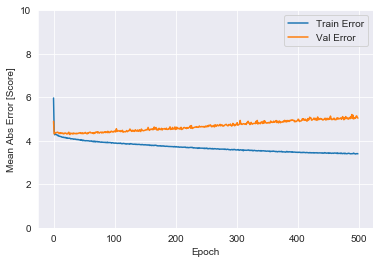

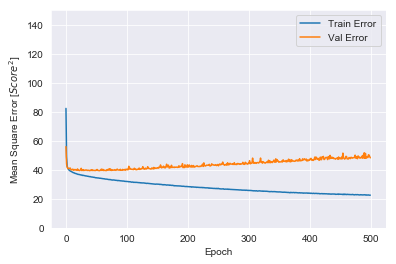

In [81]:
plot_history(history)


...............................

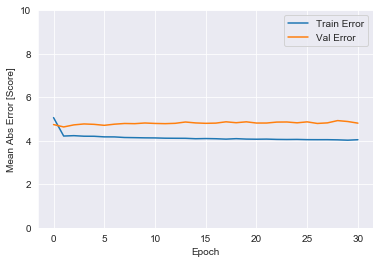

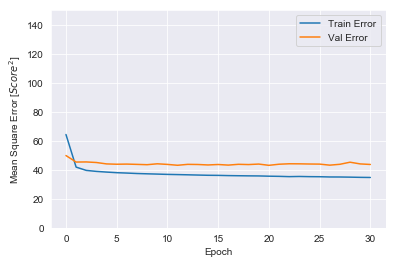

In [82]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_RB, RB_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [83]:
X_test = RBs[RB_train.columns]

In [84]:
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
RBs['DNN'] = new_predictions

In [85]:
X_train = RBtrain.drop('Score', axis=1).astype('float64')
y_train = RBtrain.Score

In [86]:
X_test = RBs[X_train.columns]

In [87]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [88]:
RBNe = neigh.predict(X_test)
RBs['NeProjections'] = RBNe

In [89]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7100.0,17.61,31.78,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,47.9,82.5,35.3,9.8,42.2,45.1,33.2,18.334505,17.80,19.10
Chase Edmonds,3800.0,3.99,31.78,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,11.1,19.1,29.2,11.8,39.6,41.0,34.6,6.731030,5.90,6.40
TJ Logan,3000.0,0.31,31.78,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,1.6,2.6,9.1,27.3,36.4,36.4,49.1,1.943819,1.16,5.50
Derrick Coleman,3000.0,0.14,31.78,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,4.8,8.2,3.2,4.8,6.5,8.1,6.5,3.016770,0.02,0.00
Tevin Coleman,4200.0,10.34,31.14,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,37.8,56.6,28.1,8.4,34.4,36.5,32.3,14.656484,10.32,23.50
Ito Smith,3700.0,8.01,31.14,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,21.6,32.4,28.8,10.3,37.7,39.1,32.7,10.506574,10.24,5.90
Brian Hill,3000.0,0.17,31.14,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,2.5,2.5,6.7,0.0,6.7,6.7,3.3,0.592717,1.26,0.70
Gus Edwards,4400.0,12.22,30.82,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,24.4,34.0,47.2,0.5,47.7,47.7,30.9,11.020520,9.68,19.40
Kenneth Dixon,3500.0,7.79,30.82,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,20.7,26.7,46.8,3.2,50.0,50.0,49.5,10.004752,17.76,6.00


In [90]:
y_test = RBs.Score
y_pred = RBs.DNN
mean_squared_error(y_test, y_pred)

52.6377889646566

In [91]:
y_test = RBs.Score
y_pred = RBs.NeProjections
mean_squared_error(y_test, y_pred)

61.873471698113214

In [92]:
WRtrain = pd.read_csv('TrainingBig/WRtrain.csv')

In [93]:
WRtrain = WRtrain.drop('Unnamed: 0', axis=1)
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,...,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000,6446.000000
mean,4.872230,2.966566,53.146385,37.994376,0.245837,6.764129,10.557739,0.139752,0.776586,0.773643,...,55.666972,6.233509,14.955895,106.149298,63.286441,239.118355,6.805104,10.746277,1.588441,88.487744
std,3.187160,2.096634,20.604708,28.347035,0.279927,3.293713,5.213018,0.352796,2.394729,2.374102,...,8.739270,1.326259,2.277674,132.403178,3.475275,24.022910,0.604845,0.749598,0.366416,9.299921
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,2.285714,1.222222,43.178333,14.000000,0.000000,4.820000,7.500000,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.187500,60.600000,225.187500,6.400000,10.200000,1.312500,82.000000
50%,4.600000,2.666667,56.670000,34.000000,0.181818,6.975000,10.900000,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.500000,35.812500,63.300000,237.875000,6.800000,10.700000,1.562500,89.000000
75%,7.057692,4.400000,66.700000,56.425595,0.375000,8.770238,13.600000,0.125000,0.228632,0.222222,...,60.000000,7.100000,16.600000,40.375000,64.900000,252.375000,7.200000,11.200000,1.875000,94.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,31.300000,50.000000,4.000000,31.000000,34.000000,...,88.900000,10.100000,22.300000,506.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [94]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Adam Thielen,1,MIN,11.000000,7.923077,72.0,95.076923,0.692308,8.6,12.0,0.230769,2.153846,9.3,0,24.0
Tyreek Hill,2,KC,8.769231,5.692308,64.9,96.769231,0.846154,11.0,17.0,1.230769,9.538462,7.8,0,23.0
Davante Adams,3,GB,10.615385,7.076923,66.7,92.000000,0.923077,8.7,13.0,0.000000,0.000000,0.0,0,22.7
Julio Jones,4,ATL,11.076923,7.230769,65.3,109.923077,0.384615,9.9,15.2,0.153846,0.923077,6.0,0,22.5
Michael Thomas,5,NO,9.076923,7.846154,86.4,93.692308,0.615385,10.3,11.9,0.000000,0.000000,0.0,0,21.4


In [95]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.000000,1.076923,53.8,9.461538,0.846154,4.7,8.8,0.0,0.0,0.0,0.0,7.1
Michael Thomas,1.769231,1.384615,78.3,9.538462,0.461538,5.4,6.9,0.0,0.0,0.0,0.0,5.1
DeAndre Hopkins,1.615385,0.923077,57.1,8.076923,0.538462,5.0,8.8,0.0,0.0,0.0,0.0,5.0
Adam Thielen,1.461538,1.076923,73.7,6.461538,0.461538,4.4,6.0,0.0,0.0,0.0,0.0,4.6
Keenan Allen,1.153846,0.846154,73.3,7.846154,0.461538,6.8,9.3,0.0,0.0,0.0,0.0,4.6


In [96]:
WRsnaps = pd.read_csv('Input/Aggregate/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.40,120.0
1,2,Leonte Carroo,MIA,WR,6,39,6.5,11.2,2.6,7.7,7.7,10.3,18.80,48.2
2,3,Albert Wilson,MIA,WR,7,231,33.0,48.2,3.5,15.2,15.2,19.0,99.78,43.2
3,4,Cordarrelle Patterson,NE,WR,13,209,16.1,22.8,18.2,11.0,26.3,29.2,84.60,40.5
4,5,Tavon Austin,DAL,WR,6,106,17.7,13.0,5.7,9.4,12.3,15.1,37.50,35.4


In [97]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [98]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,29.97
BUF,29.38
MIN,30.02
JAX,29.28
DAL,29.47


In [99]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
KC,Keenan Allen,LAC,7800.0,20.47
NE,Antonio Brown,PIT,8500.0,19.93
MIA,Adam Thielen,MIN,8600.0,19.42
CHI,Davante Adams,GB,7900.0,19.30
LAC,Tyreek Hill,KC,8300.0,19.09


In [100]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,4700.0,11.98,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
ARI,Trent Sherfield,3400.0,5.44,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
ARI,Chad Williams,3000.0,4.07,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
ARI,JJ Nelson,3400.0,3.05,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
ARI,Jalen Tolliver,3000.0,1.51,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64


In [101]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4700.0,11.98,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
Trent Sherfield,3400.0,5.44,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
Chad Williams,3000.0,4.07,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
JJ Nelson,3400.0,3.05,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
Jalen Tolliver,3000.0,1.51,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64


In [102]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4700.0,11.98,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,3.0,53.0,91.3,0.0,12.5,7.5,12.5,20.8
Trent Sherfield,3400.0,5.44,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,0.0,18.2,27.9,0.0,7.1,4.4,7.1,10.4
Chad Williams,3000.0,4.07,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,0.2,43.8,46.4,0.0,8.9,3.1,8.9,8.1
JJ Nelson,3400.0,3.05,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,0.0,15.2,26.2,2.0,9.6,5.6,11.6,6.8
Jalen Tolliver,3000.0,1.51,40.2,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,0.0,12.0,17.1,0.0,16.7,16.7,16.7,35.0


In [103]:
WRtrain = WRtrain.set_index('Name')

In [104]:
WR_train = WRtrain.drop('Home', axis=1)

train_dataset = WR_train.sample(frac=0.8,random_state=0)
test_dataset = WR_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,5157.0,4.887495,3.218426,0.000000,2.250000,4.625000,7.083333,19.000000
RecGame,5157.0,2.974934,2.113273,0.000000,1.214286,2.692308,4.416667,16.000000
RecPercentage,5157.0,52.990698,20.638411,0.000000,42.900000,56.666667,66.700000,100.000000
RecYardsGame,5157.0,38.011082,28.457588,-2.000000,13.833333,34.000000,56.500000,180.000000
RecTdGame,5157.0,0.245244,0.280775,0.000000,0.000000,0.181818,0.375000,2.000000
YardsTarget,5157.0,6.730373,3.253772,-2.000000,4.800000,6.957143,8.755556,31.300000
RecYardsRec,5157.0,10.509351,5.197532,-2.000000,7.475000,10.883333,13.600000,50.000000
RushesGame,5157.0,0.139268,0.347500,0.000000,0.000000,0.000000,0.125000,4.000000
RushYardsGame,5157.0,0.779575,2.361241,-7.000000,0.000000,0.000000,0.250000,31.000000
YardAttempt,5157.0,0.775418,2.376730,-7.000000,0.000000,0.000000,0.250000,34.000000


In [105]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



......................................

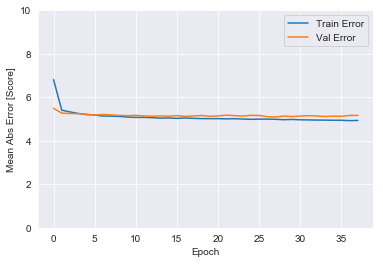

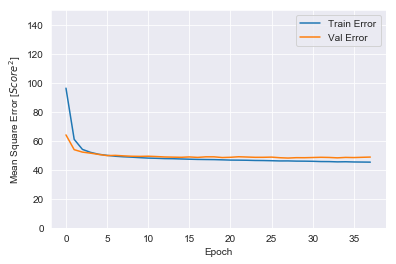

In [106]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [107]:
columns = WR_train.drop('Score', axis=1)
X_test = WRs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
WRs['DNN'] = new_predictions

In [108]:
X_train = WRtrain.drop('Score', axis=1).astype('float64')
y_train = WRtrain.Score
X_test = WRs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
WRNe = neigh.predict(X_test)
WRs['NeProjections'] = WRNe

In [109]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,4700.0,11.98,40.20,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,53.0,91.3,0.0,12.5,7.5,12.5,20.8,13.569151,6.660,15.2
Trent Sherfield,3400.0,5.44,40.20,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,18.2,27.9,0.0,7.1,4.4,7.1,10.4,6.226613,5.660,10.5
JJ Nelson,3400.0,3.05,40.20,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,15.2,26.2,2.0,9.6,5.6,11.6,6.8,5.316097,4.360,0.0
Jalen Tolliver,3000.0,1.51,40.20,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,12.0,17.1,0.0,16.7,16.7,16.7,35.0,7.112975,6.220,0.0
Julio Jones,8400.0,19.08,34.68,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,54.7,81.9,0.3,20.3,13.5,20.5,41.2,18.255875,21.772,20.2
Calvin Ridley,5000.0,11.51,34.68,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,40.5,60.6,1.1,14.3,10.8,15.4,32.2,9.500088,12.760,9.2
Mohamed Sanu,4600.0,10.34,34.68,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,52.0,77.9,0.4,10.4,8.1,10.9,20.3,9.952183,12.760,7.1
Justin Hardy,3000.0,2.45,34.68,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,14.2,21.3,0.0,9.2,5.9,9.2,14.8,1.635453,8.400,11.9
Marvin Hall,3000.0,1.92,34.68,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,11.2,16.8,1.4,9.6,7.5,11.0,19.8,1.006967,5.900,2.0


In [110]:
y_test = WRs.Score
y_pred = WRs.DNN
mean_squared_error(y_test, y_pred)

45.100621424449855

In [111]:
y_test = WRs.Score
y_pred = WRs.NeProjections
mean_squared_error(y_test, y_pred)

47.632713393548386

In [112]:
TEtrain = pd.read_csv('TrainingBig/TEtrain.csv')

In [113]:
TEtrain = TEtrain.drop('Unnamed: 0', axis=1)
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,...,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000
mean,3.299438,2.182354,55.097046,24.514616,0.196963,6.116141,8.491863,0.009515,0.031250,0.049617,...,55.754688,6.248820,14.949107,109.767239,63.311958,239.413667,6.813233,10.754401,1.594442,88.580038
std,2.443452,1.695513,21.902704,20.842771,0.245147,3.282348,4.532905,0.048289,0.240938,0.484619,...,8.915552,1.346266,2.287886,135.128018,3.513994,24.419127,0.613610,0.755471,0.372840,9.420936
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-2.700000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.220238,0.800000,41.675000,7.909091,0.000000,4.123750,5.329643,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.187500,60.600000,225.187500,6.400000,10.200000,1.312500,82.000000
50%,2.625000,1.714286,59.330000,18.666667,0.125000,6.055000,8.607143,0.000000,0.000000,0.000000,...,55.300000,6.250000,14.700000,35.812500,63.300000,237.875000,6.800000,10.700000,1.562500,89.000000
75%,5.000000,3.377404,70.387500,37.178571,0.300000,8.061667,11.201923,0.000000,0.000000,0.000000,...,60.000000,7.100000,16.600000,40.625000,65.200000,254.062500,7.200000,11.200000,1.875000,95.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,88.900000,10.100000,22.300000,506.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [114]:
TEtrain = TEtrain.set_index('Name')

In [115]:
TE_train = TEtrain.drop('Home', axis=1)

train_dataset = TE_train.sample(frac=0.8,random_state=0)
test_dataset = TE_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,2509.0,3.300757,2.438742,0.000000,1.200000,2.666667,5.000000,13.500000
RecGame,2509.0,2.182214,1.694372,0.000000,0.800000,1.714286,3.333333,9.000000
RecPercentage,2509.0,54.895066,21.797119,0.000000,41.666667,59.330000,70.000000,100.000000
RecYardsGame,2509.0,24.406069,20.709062,-0.600000,7.800000,18.900000,36.777778,114.500000
RecTdGame,2509.0,0.195720,0.243001,0.000000,0.000000,0.142857,0.300000,3.000000
YardsTarget,2509.0,6.042298,3.188713,-0.600000,4.066667,6.050000,8.000000,32.000000
RecYardsRec,2509.0,8.402331,4.460556,-0.600000,5.250000,8.575000,11.125000,35.000000
RushesGame,2509.0,0.009666,0.049465,0.000000,0.000000,0.000000,0.000000,1.000000
RushYardsGame,2509.0,0.031098,0.251137,-0.800000,0.000000,0.000000,0.000000,5.500000
YardAttempt,2509.0,0.048864,0.488575,-2.700000,0.000000,0.000000,0.000000,10.000000


In [116]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



....................................

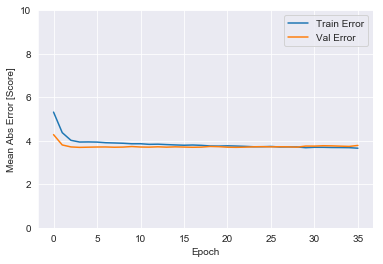

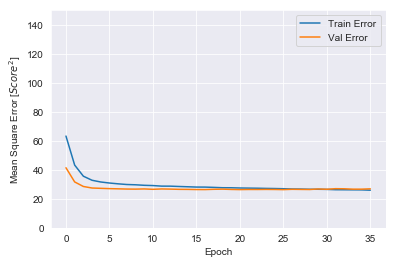

In [117]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [118]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Travis Kelce,1,KC,9.461538,6.615385,69.9,89.153846,0.769231,9.4,13.5,0.000000,0.000000,0.0,0,21.2
Zach Ertz,2,PHI,9.923077,7.538462,76.0,78.153846,0.461538,7.9,10.4,0.000000,0.000000,0.0,0,19.0
George Kittle,3,SF,7.846154,5.307692,67.6,84.846154,0.307692,10.8,16.0,0.076923,0.769231,10.0,0,16.6
Eric Ebron,4,IND,7.384615,4.461538,60.4,50.307692,0.923077,6.8,11.3,0.230769,-0.615385,-2.7,1,15.6
Jared Cook,5,OAK,6.769231,4.692308,69.3,63.461538,0.461538,9.4,13.5,0.000000,0.000000,0.0,0,14.7


In [119]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.538462,0.846154,55.0,9.692308,0.769231,6.3,11.5,0.153846,0.076923,0.5,0.076923,6.9
Travis Kelce,1.692308,1.076923,63.6,8.461538,0.692308,5.0,7.9,0.000000,0.000000,0.0,0.000000,6.1
Zach Ertz,1.538462,0.923077,60.0,7.538462,0.461538,4.9,8.2,0.000000,0.000000,0.0,0.000000,4.4
Cameron Brate,0.846154,0.615385,72.7,5.538462,0.461538,6.5,9.0,0.000000,0.000000,0.0,0.000000,3.9
Austin Hooper,0.923077,0.692308,75.0,3.769231,0.307692,4.1,5.4,0.000000,0.000000,0.0,0.000000,3.1


In [120]:
TEsnaps = pd.read_csv('Input/Aggregate/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Robert Tonyan Jr.,GB,TE,13,30,2.3,3.5,0.0,10.0,6.7,10.0,13.9,46.3
1,2,Erik Swoope,IND,TE,7,78,11.1,10.2,0.0,12.8,10.3,12.8,34.7,44.5
2,3,Jordan Franks,CIN,TE,3,11,3.7,5.9,0.0,27.3,18.2,27.3,5.7,51.8
3,4,Anthony Firkser,TEN,TE,7,94,13.4,22.7,0.0,17.0,17.0,17.0,42.1,44.8
4,5,Eric Ebron,IND,TE,13,537,41.3,58.6,0.6,17.9,11.5,18.6,202.6,37.7


In [121]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [122]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,14.48
BUF,8.48
MIN,10.69
JAX,13.18
DAL,15.18


In [123]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
LAC,Travis Kelce,KC,7400.0,19.25
LAR,Zach Ertz,PHI,6500.0,15.47
SEA,George Kittle,SF,6300.0,15.17
DAL,Eric Ebron,IND,5900.0,14.09
PIT,Rob Gronkowski,NE,5800.0,12.73


In [124]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,2600.0,5.67,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
ARI,Jermaine Gresham,2500.0,2.42,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
ARI,John Phillips,2500.0,0.27,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
ARI,Darrell Daniels,2500.0,0.03,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
ATL,Austin Hooper,4200.0,9.59,9.52,25.2,67.20000,350.950459,5.2,21.963303,13.023853,...,46.1,3.075949,65.0,39.218354,70.4,293.753165,7.5,10.6,2.153165,105


In [125]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2600.0,5.67,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
Jermaine Gresham,2500.0,2.42,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
John Phillips,2500.0,0.27,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
Darrell Daniels,2500.0,0.03,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,31.0,1.693258,68.2,30.324719,56.9,158.396629,5.2,9.2,0.923596,64
Austin Hooper,4200.0,9.59,9.52,25.2,67.20000,350.950459,5.2,21.963303,13.023853,37.3,...,46.1,3.075949,65.0,39.218354,70.4,293.753165,7.5,10.6,2.153165,105


In [126]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2600.0,5.67,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,0.0,36.6,63.0,0.0,12.8,6.3,12.8,14.2
Jermaine Gresham,2500.0,2.42,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,0.2,31.9,53.4,0.0,3.1,2.3,3.1,4.2
John Phillips,2500.0,0.27,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,0.0,11.0,18.0,0.0,0.0,0.0,0.0,0.0
Darrell Daniels,2500.0,0.03,10.07,28.2,63.46921,386.501362,6.1,23.512807,12.140599,51.3,...,0.0,0.0,0.0,7.0,8.8,0.0,1.4,0.0,1.4,0.0
Austin Hooper,4200.0,9.59,9.52,25.2,67.20000,350.950459,5.2,21.963303,13.023853,37.3,...,0.0,0.0,3.1,53.5,80.1,0.0,11.4,9.2,11.4,21.0


In [127]:
columns = TE_train.drop('Score', axis=1)
X_test = TEs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
TEs['DNN'] = new_predictions

In [128]:
X_train = TEtrain.drop('Score', axis=1).astype('float64')
y_train = TEtrain.Score
X_test = TEs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
TENe = neigh.predict(X_test)
TEs['NeProjections'] = TENe

In [129]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2600.0,5.67,10.07,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,36.6,63.0,0.0,12.8,6.3,12.8,14.2,6.361814,3.96,5.2
Jermaine Gresham,2500.0,2.42,10.07,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,31.9,53.4,0.0,3.1,2.3,3.1,4.2,3.076542,2.64,2.6
John Phillips,2500.0,0.27,10.07,28.2,63.469210,386.501362,6.1,23.512807,12.140599,51.3,...,11.0,18.0,0.0,0.0,0.0,0.0,0.0,0.592188,2.64,0.0
Austin Hooper,4200.0,9.59,9.52,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,53.5,80.1,0.0,11.4,9.2,11.4,21.0,11.612711,7.02,0.0
Logan Paulsen,2500.0,1.86,9.52,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,24.4,33.8,0.0,2.7,2.7,2.7,7.2,0.795105,3.18,0.0
Eric Saubert,2500.0,0.88,9.52,25.2,67.200000,350.950459,5.2,21.963303,13.023853,37.3,...,9.4,14.1,0.0,7.4,4.1,7.4,8.0,2.738072,2.42,0.0
Mark Andrews,2700.0,4.86,15.00,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,26.0,34.7,0.0,11.5,7.7,11.5,22.6,4.649284,5.02,5.1
Nick Boyle,2500.0,3.10,15.00,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,42.6,56.9,0.0,6.3,3.8,6.3,7.4,5.090304,5.96,0.0
Hayden Hurst,2500.0,2.00,15.00,29.5,61.464752,388.429504,6.3,22.259791,11.014360,38.5,...,23.0,31.4,0.5,6.8,3.9,7.2,10.2,2.517654,0.38,5.0


In [130]:
y_test = TEs.Score
y_pred = TEs.DNN
mean_squared_error(y_test, y_pred)

23.670813752530126

In [131]:
y_test = TEs.Score
y_pred = TEs.NeProjections
mean_squared_error(y_test, y_pred)

21.677567441860468